In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [ ]:
import pandas as pd

file_path = "/content/disease_pidsr_totals.csv"
df = pd.read_csv(file_path)
df.head()

,uuid,freq,date,source_name,source_filename,adm3_pcode,disease_icd10_code,disease_common_name,case_total
0,DPSRT000000,W,2008-01-07,PIDSR-DOH,City-weekly_2008-2022,PH015518000,A09.0,ACUTE BLOODY DIARRHEA,0
1,DPSRT000001,W,2008-01-07,PIDSR-DOH,City-weekly_2008-2022,PH034919000,A09.0,ACUTE BLOODY DIARRHEA,0
2,DPSRT000002,W,2008-01-07,PIDSR-DOH,City-weekly_2008-2022,PH050506000,A09.0,ACUTE BLOODY DIARRHEA,0
3,DPSRT000003,W,2008-01-07,PIDSR-DOH,City-weekly_2008-2022,PH063022000,A09.0,ACUTE BLOODY DIARRHEA,0
4,DPSRT000004,W,2008-01-07,PIDSR-DOH,City-weekly_2008-2022,PH072230000,A09.0,ACUTE BLOODY DIARRHEA,0


Question 1

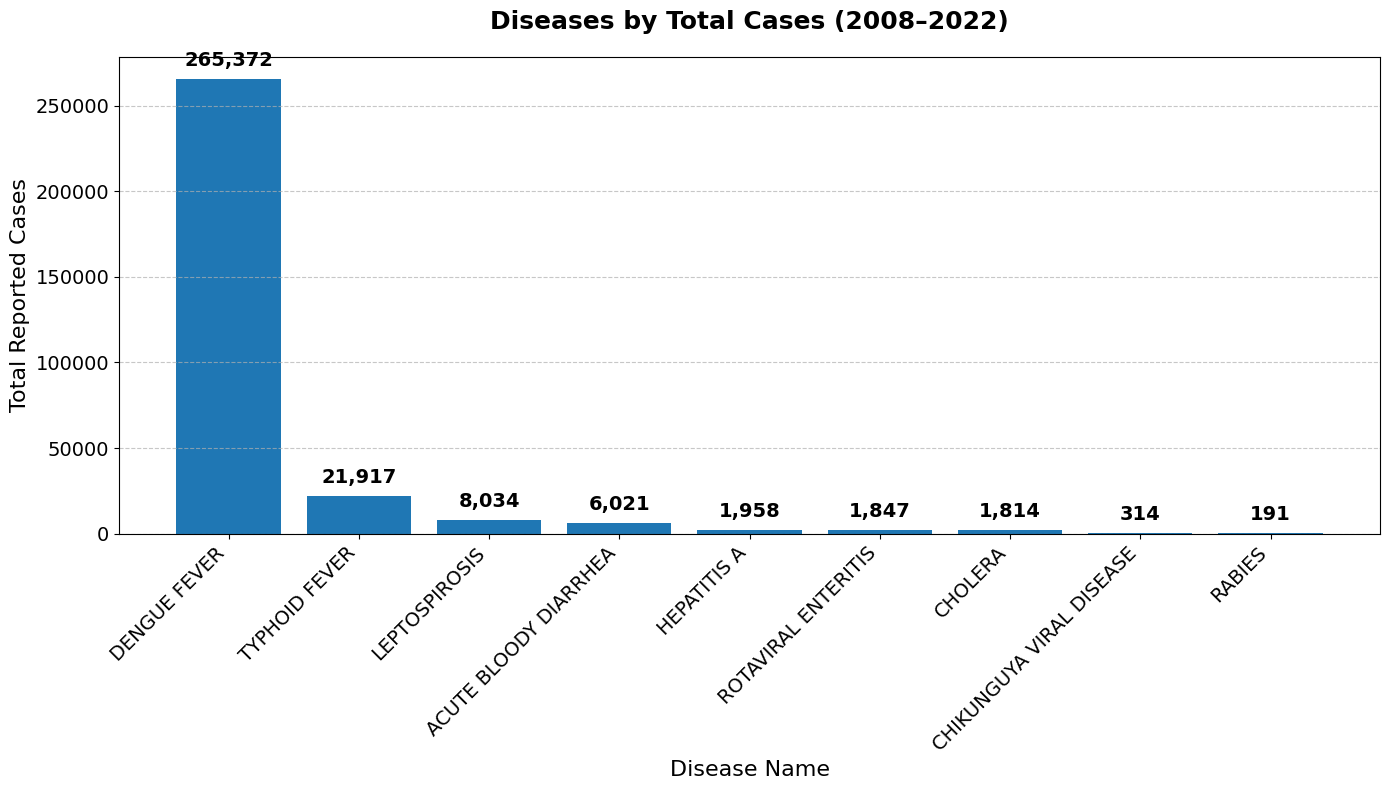

The bar chart illustrates the total reported cases for all diseases in the Philippines from 2008 to 2022, based on the dataset. 
The reported cases are distributed across the following diseases:
- DENGUE FEVER: 265,372 total cases
- TYPHOID FEVER: 21,917 total cases
- LEPTOSPIROSIS: 8,034 total cases
- ACUTE BLOODY DIARRHEA: 6,021 total cases
- HEPATITIS A: 1,958 total cases
- ROTAVIRAL ENTERITIS: 1,847 total cases
- CHOLERA: 1,814 total cases
- CHIKUNGUYA VIRAL DISEASE: 314 total cases
- RABIES: 191 total cases

The data shows variations in total reported cases across diseases, with some diseases reporting significantly higher cases than others. 
This variation underscores the need for targeted interventions to address the diseases with the highest burden effectively.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'disease_pidsr_totals.csv'
data = pd.read_csv(file_path)

total_cases_by_disease = data.groupby('disease_common_name')['case_total'].sum().reset_index()
total_cases_by_disease = total_cases_by_disease.sort_values('case_total', ascending=False)

# Plotting all diseases by total cases
plt.figure(figsize=(14, 8))
bars = plt.bar(total_cases_by_disease['disease_common_name'], total_cases_by_disease['case_total'], color='#1f77b4')
plt.title('Diseases by Total Cases (2008–2022)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Disease Name', fontsize=16, fontweight='regular')
plt.ylabel('Total Reported Cases', fontsize=16, fontweight='regular')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(fontsize=14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02 * max(total_cases_by_disease['case_total']),
             f'{int(yval):,}', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

total_cases_by_disease['case_total'] = total_cases_by_disease['case_total'].apply(lambda x: f"{int(x):,}")
explanation = (
    f"The bar chart illustrates the total reported cases for all diseases in the Philippines from 2008 to 2022, "
    f"based on the dataset. \nThe reported cases are distributed across the following diseases:\n"
)

for index, row in total_cases_by_disease.iterrows():
    explanation += f"- {row['disease_common_name']}: {row['case_total']} total cases\n"

explanation += (
    "\nThe data shows variations in total reported cases across diseases, with some diseases reporting significantly "
    "higher cases than others. \nThis variation underscores the need for targeted interventions to address the diseases "
    "with the highest burden effectively."
)

print(explanation)

Question 2

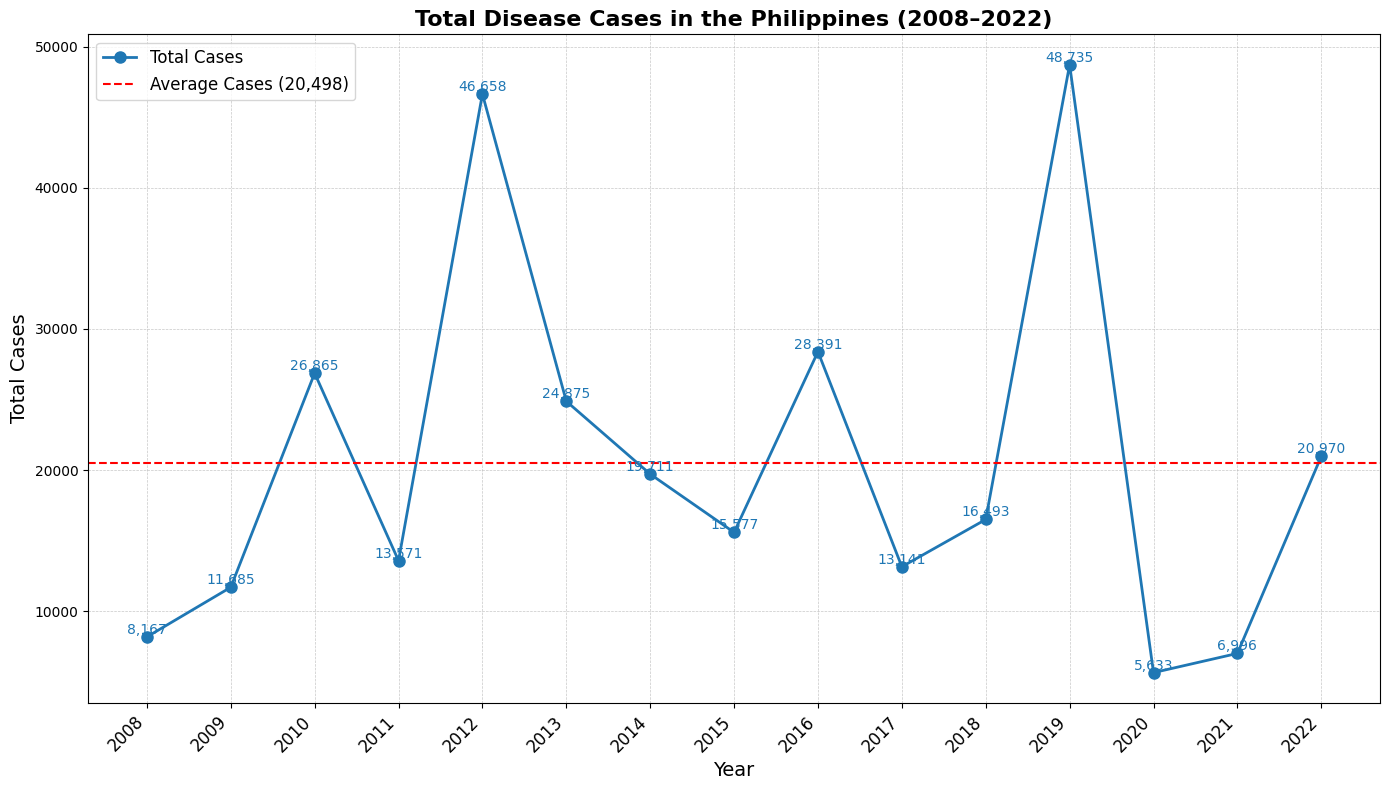

The graph illustrates the total number of disease cases reported yearly in the Philippines from 2008 to 2022. The data reveals significant trends:

- The highest total cases were recorded in 2019, with 48,735 cases.
- The lowest total cases were observed in 2020, with 5,633 cases.
- The average number of cases reported per year during this period was approximately 20,497.

The graph highlights fluctuations in total disease cases over time, which may reflect varying factors such as outbreaks, reporting improvements, or 
health interventions.



In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year

yearly_cases = data.groupby('year')['case_total'].sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(
    yearly_cases['year'],
    yearly_cases['case_total'],
    marker='o',
    linestyle='-',
    color='tab:blue',
    linewidth=2,
    markersize=8,
    label='Total Cases'
)

plt.title('Total Disease Cases in the Philippines (2008–2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(yearly_cases['year'], rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

for i, year in enumerate(yearly_cases['year']):
    plt.text(
        yearly_cases['year'][i],
        yearly_cases['case_total'][i],
        f'{yearly_cases["case_total"][i]:,}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='tab:blue'
    )

average_cases = yearly_cases['case_total'].mean()
plt.axhline(average_cases, color='red', linestyle='--', label=f'Average Cases ({average_cases:,.0f})')
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
yearly_cases = data.groupby('year')['case_total'].sum().reset_index()

if 'year' in yearly_cases.columns and 'case_total' in yearly_cases.columns:
    max_year = yearly_cases.loc[yearly_cases['case_total'].idxmax()]
    min_year = yearly_cases.loc[yearly_cases['case_total'].idxmin()]
    average_cases = yearly_cases['case_total'].mean()

    explanation = (
        f"The graph illustrates the total number of disease cases reported yearly in the Philippines "
        f"from 2008 to 2022. The data reveals significant trends:\n\n"
        f"- The highest total cases were recorded in {int(max_year['year'])}, with {int(max_year['case_total']):,} cases.\n"
        f"- The lowest total cases were observed in {int(min_year['year'])}, with {int(min_year['case_total']):,} cases.\n"
        f"- The average number of cases reported per year during this period was approximately {int(average_cases):,}.\n\n"
        "The graph highlights fluctuations in total disease cases over time, which may reflect varying factors such as "
        "outbreaks, reporting improvements, or \nhealth interventions.\n"
    )
    print(explanation)
else:
    print("Error: 'yearly_cases' does not have the required columns: 'year' and 'case_total'.")

Question 3


<Figure size 1600x900 with 0 Axes>

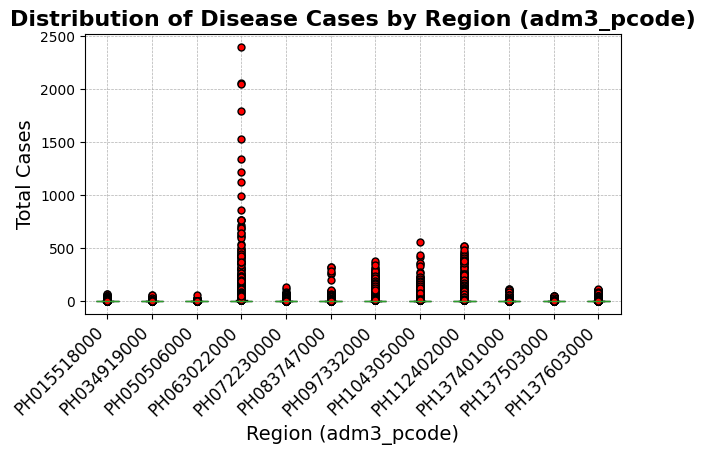

Summary statistics saved to region_summary.csv
Summary of Disease Case Variations Across Regions:

Region: 0
 - Total Cases: 0
 - Median Cases: 0
 - Min Cases: 0
 - Max Cases: 70
 - Mean Cases: 1.52

Region: 1
 - Total Cases: 0
 - Median Cases: 0
 - Min Cases: 0
 - Max Cases: 57
 - Mean Cases: 0.31

Region: 2
 - Total Cases: 0
 - Median Cases: 0
 - Min Cases: 0
 - Max Cases: 55
 - Mean Cases: 0.38

Region: 3
 - Total Cases: 0
 - Median Cases: 0
 - Min Cases: 0
 - Max Cases: 2,398
 - Mean Cases: 13.33

Region: 4
 - Total Cases: 0
 - Median Cases: 0
 - Min Cases: 0
 - Max Cases: 129
 - Mean Cases: 1.87

Region: 5
 - Total Cases: 0
 - Median Cases: 0
 - Min Cases: 0
 - Max Cases: 324
 - Mean Cases: 1.94

Region: 6
 - Total Cases: 0
 - Median Cases: 0
 - Min Cases: 0
 - Max Cases: 383
 - Mean Cases: 7.79

Region: 7
 - Total Cases: 0
 - Median Cases: 0
 - Min Cases: 0
 - Max Cases: 554
 - Mean Cases: 6.16

Region: 8
 - Total Cases: 0
 - Median Cases: 0
 - Min Cases: 0
 - Max Cases: 522
 - M

In [ ]:
plt.figure(figsize=(16, 9))

data.boxplot(
    column='case_total',
    by='adm3_pcode',
    grid=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markerfacecolor='red', marker='o', markersize=5),
)

plt.title('Distribution of Disease Cases by Region (adm3_pcode)', fontsize=16, fontweight='bold')
plt.suptitle('')
plt.xlabel('Region (adm3_pcode)', fontsize=14)
plt.ylabel('Total Cases', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

output_file = "region_summary.csv"
region_summary.to_csv(output_file, index=True)
print(f"Summary statistics saved to {output_file}")

summary_text = "Summary of Disease Case Variations Across Regions:\n\n"
for region, stats in region_summary.iterrows():
    summary_text += (
        f"Region: {region}\n"
        f" - Total Cases: {int(data[data['adm3_pcode'] == region]['case_total'].sum()):,}\n"
        f" - Median Cases: {int(stats['50%']):,}\n"
        f" - Min Cases: {int(stats['min']):,}\n"
        f" - Max Cases: {int(stats['max']):,}\n"
        f" - Mean Cases: {stats['mean']:.2f}\n\n"
    )
print(summary_text)

Question 4

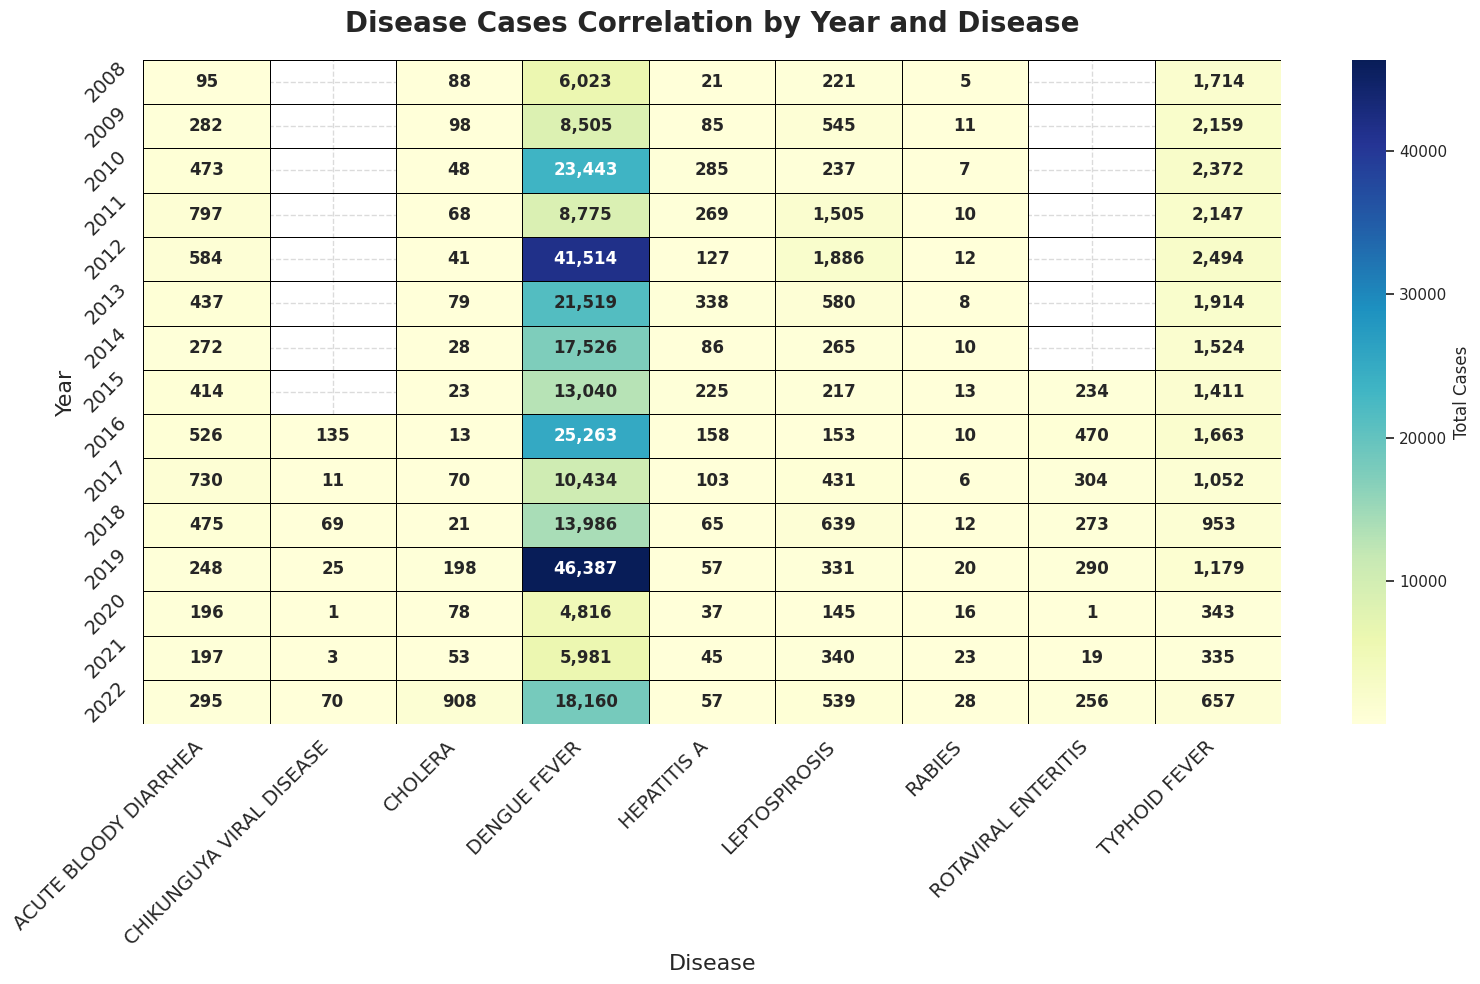

Full Disease Cases Summary Table:
                    Disease  Max Total Cases  Year with Max Cases  \
0     ACUTE BLOODY DIARRHEA            797.0                 2011   
1  CHIKUNGUYA VIRAL DISEASE            135.0                 2016   
2                   CHOLERA            908.0                 2022   
3              DENGUE FEVER          46387.0                 2019   
4               HEPATITIS A            338.0                 2013   
5             LEPTOSPIROSIS           1886.0                 2012   
6                    RABIES             28.0                 2022   
7       ROTAVIRAL ENTERITIS            470.0                 2016   
8             TYPHOID FEVER           2494.0                 2012   

   Min Total Cases  Year with Min Cases  Total Cases Across All Years  
0             95.0                 2008                        6021.0  
1              1.0                 2020                         314.0  
2             13.0                 2016                    

In [ ]:
import seaborn as sns

data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
heatmap_data = data.groupby(['year', 'disease_common_name'])['case_total'].sum().unstack()
plt.figure(figsize=(16, 10))
sns.set_theme(style="whitegrid")
heatmap = sns.heatmap(heatmap_data, annot=True, fmt=",.0f", cmap="YlGnBu", cbar_kws={'label': 'Total Cases'},
                      annot_kws={"size": 12, "weight": "bold"}, linewidths=0.5, linecolor='black',
                      xticklabels=True, yticklabels=True)

plt.title('Disease Cases Correlation by Year and Disease', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Disease', fontsize=16, fontweight='regular')
plt.ylabel('Year', fontsize=16, fontweight='regular')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=45, fontsize=14)
plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

max_case_disease = heatmap_data.max(axis=0)
min_case_disease = heatmap_data.min(axis=0)

max_case_year = heatmap_data.idxmax(axis=0)
min_case_year = heatmap_data.idxmin(axis=0)

summary_table = pd.DataFrame({
    'Disease': heatmap_data.columns,
    'Max Total Cases': max_case_disease.values,
    'Year with Max Cases': max_case_year.values,
    'Min Total Cases': min_case_disease.values,
    'Year with Min Cases': min_case_year.values,
    'Total Cases Across All Years': heatmap_data.sum(axis=0).values
})

print("Full Disease Cases Summary Table:")
print(summary_table)

output_file = 'heatmap_summary_table.csv'
summary_table.to_csv(output_file, index=False)